# Emotion in Reddit and ABA Divorce Conversations

In [6]:
import text2emotion as t2e
import matplotlib.pyplot as plt
import numpy as np

Read emotions from Redditor comments

In [2]:
with open("./data/new500comments.txt") as f:
    test_str = f.read()

with open("./data/top500comments.txt") as f:
    test_str += f.read()

reddit_comment_emotions = t2e.get_emotion(test_str)

Read emotions from ABA client posts

In [56]:
with open("./data/shortest_clients.txt") as f:
    client_str = f.read()

client_initial_emotions = t2e.get_emotion(client_str)

Read emotions from Redditor posts

In [57]:
with open("./data/divorce.txt") as f:
    divorce_posts = f.read()

reddit_poster_emotions = t2e.get_emotion(divorce_posts)

Read emotions from Reddit overall

In [58]:
reddit_overall_str = divorce_posts + test_str

reddit_overall_emotions = t2e.get_emotion(reddit_overall_str)

Emotions from ABA overall, pulled Lily's code

In [59]:
aba_overall_emotions = {'Happy': 19.159999999999993,
        'Angry': 6.989999999999997,
        'Surprise': 27.950000000000003,
        'Sad': 46.16999999999998,
        'Fear': 97.63000000000005
    }

Graphing Setup

In [60]:
emotes = ["Happy", "Angry", "Surprise", "Sad", "Fear"]
x_axis = np.arange(len(emotes))
colors = ["yellow", "red", "green", "blue", "purple"]

Graph 1: Overall conversation emotion between Reddit and the ABA

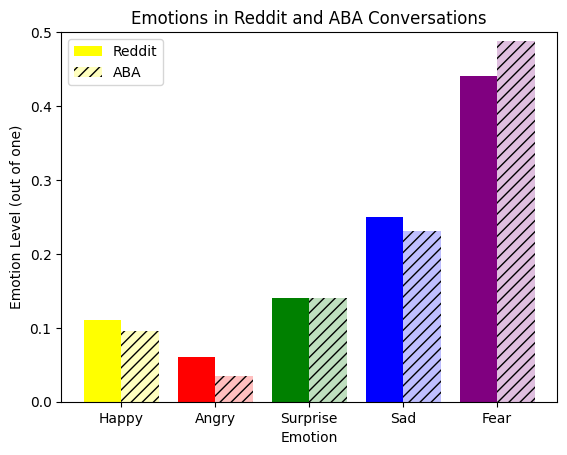

In [ ]:
plt.bar(x_axis - .2, [e for e in list(reddit_overall_emotions.values())], .4, color = colors)
plt.bar(x_axis + .2, [e / 200 for e in list(aba_overall_emotions.values())], .4, color = colors, alpha = .25, hatch = "///")

plt.xticks(x_axis, emotes)

plt.title("Emotions in Reddit and ABA Conversations")
plt.ylim([0, .5])
plt.xlabel("Emotion")
plt.ylabel("Emotion Level (out of one)")
plt.legend(["Reddit", "ABA"])
plt.show()

Graph 2: Reddit Client vs Overall then ABA Client vs Overall

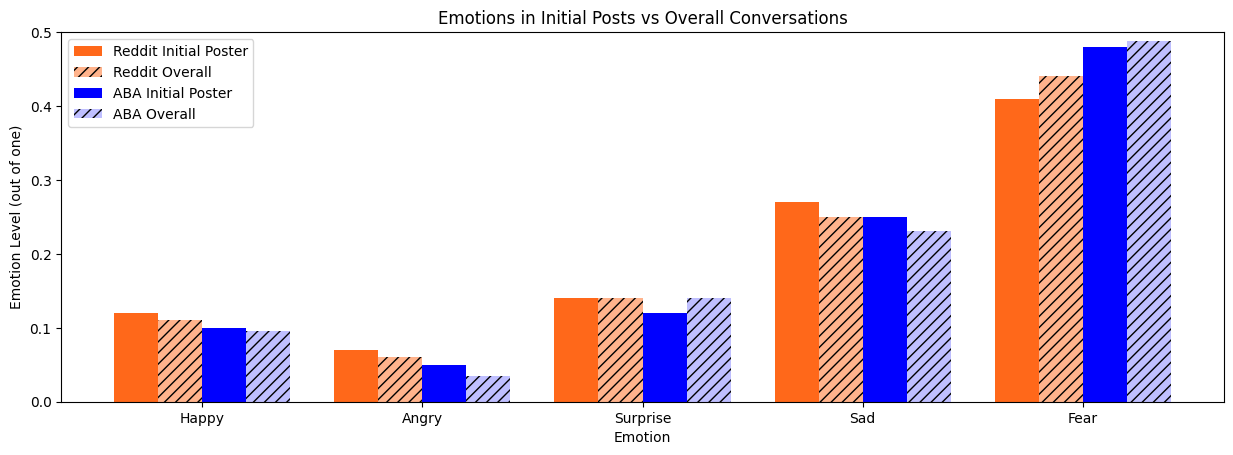

In [83]:
plt.figure().set_figwidth(15)

plt.bar(x_axis - .3, [e for e in list(reddit_poster_emotions.values())], .2, color = "#ff681a")
plt.bar(x_axis - .1, [e  for e in list(reddit_overall_emotions.values())], .2, color = "#ff681a", alpha = .5, hatch = "///")
plt.bar(x_axis + .1, [e for e in list(client_initial_emotions.values())], .2, color = "blue")
plt.bar(x_axis + .3, [e / 200 for e in list(aba_overall_emotions.values())], .2, color = "blue", alpha = .25, hatch = "///")

plt.xticks(x_axis, emotes)

plt.title("Emotions in Initial Posts vs Overall Conversations")
plt.ylim([0, .5])
plt.xlabel("Emotion")
plt.ylabel("Emotion Level (out of one)")
plt.legend(["Reddit Initial Poster","Reddit Overall", "ABA Initial Poster", "ABA Overall"])
plt.show()

Plotting considering emotion and whether something was resolved

In [10]:
with open("./data/posts_unresolved.txt") as f:
    unresolved = f.read()

unresolved_emotions = t2e.get_emotion(unresolved)

In [11]:
with open("./data/posts_unopened.txt") as f:
    unopened = f.read()

unopened_emotions = t2e.get_emotion(unopened)

In [17]:
with open("./data/short_resolved.txt") as f:
    resolved = f.read()

resolved_emotions = t2e.get_emotion(resolved)

In [14]:
with open("./data/unresolved_emotions.txt", "w") as f:
    f.write(str(unresolved_emotions))

with open("./data/unopened_emotions.txt", "w") as f:
    f.write(str(unopened_emotions))

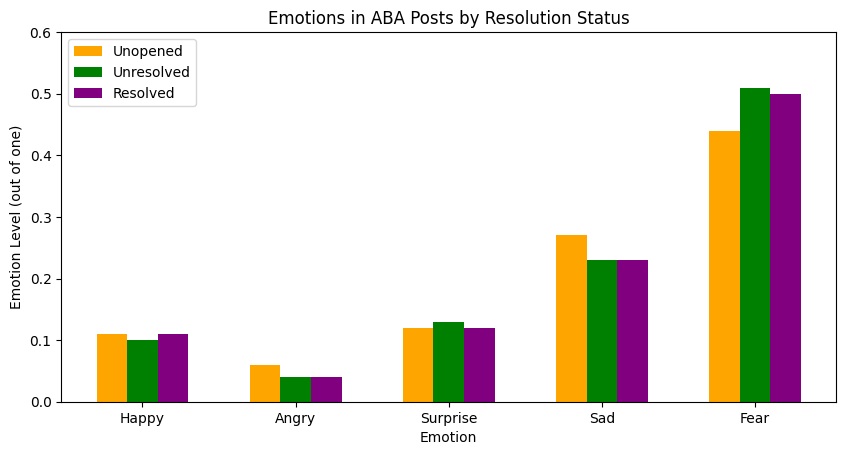

In [82]:
plt.figure().set_figwidth(10)

plt.bar(x_axis - .2, [e for e in list(unopened_emotions.values())], .2, color = "orange")
plt.bar(x_axis , [e  for e in list(unresolved_emotions.values())], .2, color = "green")
plt.bar(x_axis + .2, [e  for e in list(resolved_emotions.values())], .2, color = "purple")

plt.xticks(x_axis, emotes)

plt.title("Emotions in ABA Posts by Resolution Status")
plt.ylim([0, .6])
plt.xlabel("Emotion")
plt.ylabel("Emotion Level (out of one)")
plt.legend(["Unopened", "Unresolved", "Resolved"])
plt.show()